This notebook displays our model result from 2002 to 2007.

In [214]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*sub*2007*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
["/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_['T200201-200712.nc'].nc"]


In [215]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]




bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]


In [216]:
#take a look at the time dimension
diss=ptrc.variables['TR_7'][:,0,0,0]
tlen=diss.shape
print tlen[0]

72


### Focus on the time evolution

In [267]:
def readdata(phase,string,i,a1,a2,b1,b2):
    if string =='Pa':
        if phase =='diss':
            if i==0:
                data=ptrc.variables['TR_7'][:,:,a1:a2,b1:b2]
            else:
                data=ptrc.variables['TR_7'][:,i,a1:a2,b1:b2]
        else:
            if i==0:
                data=ptrc.variables['TR_9'][:,:,a1:a2,b1:b2]
            else:
                data=ptrc.variables['TR_9'][:,i,a1:a2,b1:b2]
    else:
        if phase =='diss':
            if i==0:
                data=ptrc.variables['TR_8'][:,:,a1:a2,b1:b2]
            else:
                data=ptrc.variables['TR_8'][:,i,a1:a2,b1:b2]
        else:
            if i==0:
                data=ptrc.variables['TR_10'][:,:,a1:a2,b1:b2]
            else:
                data=ptrc.variables['TR_10'][:,i,a1:a2,b1:b2]
    data=np.ma.masked_where(data<=0,data)
    return data

def tracer_evolution(ptrc,j,string,name):
    

    
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(3, 3)
    
    ax = fig.add_subplot(gs[0:2,0])
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    #x=[700,630,600]
    #y=[200,300,350]
    #c=['orange','red','cyan']
    x_lon,y_lat = m(lon,lat)
    plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
    #m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=40,alpha=0.8)
    m.plot(x_lon[660-400,250:300],y_lat[660-400,250:300],color='orange')
    m.plot(x_lon[615-400:650-400,305],y_lat[615-400:650-400,306],color='red')
    
    #evaluation   
    elat=np.array([83.114,   87.623  ]) #     83°06.826 87°37.375 N  
    elon=np.array([-174.88,  156.09  ]) #   174°52.689W 156°05.581 E
    e_lon,e_lat = m(elon,elat)
    m.scatter(e_lon,e_lat,marker='+',color='red',s=60)
    
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.05,colors='black',alpha=0.2)
    plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')
    


    
    
    ax = fig.add_subplot(gs[0,1])
    i=j[0]
    for loc in range (len(x)):
        data=readdata('diss','Th',i=0,a1=660-400,a2=661-400,b1=250,b2=300)\
            +readdata('part','Th',i=0,a1=660-400,a2=661-400,b1=250,b2=300)
        plt.pcolor(lat[660-400,250:300],dep[lmin:lmax],data[-1,lmin:lmax,0,:],alpha=0.5)
    plt.colorbar()
    y0=np.array([20.1,100.0,292.5,491.3,691.5,1091.5,1290.9,1491.4,1691.5,1891.1,2092.1,2290.9,2480.4,2692.2])
    x0=np.array([0.23097531,0.3115801186,0.5066939254,0.6922778619,0.6283046556,0.7627209815,0.7814033969,
        1.0046730342,0.9339497418,1.096588395,1.1791569817,1.2986671687,1.3412285366,1.6945276994])
    lats=np.zeros(len(y0))
    #print len(y0),lats.shape
    lats[:]=elat[0]
    
    plt.scatter(lats[:],y0,c=x0,vmin=np.min(data[-1,lmin:lmax,0,:]),
                vmax=np.max(data[-1,lmin:lmax,0,:]),s=40)
    plt.ylim([500,4000])
    plt.gca().invert_yaxis()
    plt.title('%s'%(name[0]))
    
    
    
    ax = fig.add_subplot(gs[0,2])
    i=j[0]
    plt.plot(x0,y0,'--',lw=2,label='data')
    #pay attention to the index
    for i in range (len(data[:,0,0,0])):
        plt.plot(data[i,lmin:lmax,0,20],dep[lmin:lmax],lw=2)#,label='simulation')
    plt.ylim([500,3500])
    plt.gca().invert_yaxis()
    plt.title('%s'%(name[0]))
    plt.legend()
    
    
    ax = fig.add_subplot(gs[1,1])
    i=j[0]
    for loc in range (len(x)):
        data=readdata('diss','Th',i=0,a1=615-400,a2=650-400,b1=305,b2=306)\
            +readdata('part','Th',i=0,a1=615-400,a2=650-400,b1=305,b2=306)
        print lat[615-400:650-400,300].shape,data[-1,lmin:lmax,:,0].shape
        plt.pcolor(lat[615-400:650-400,300],dep[lmin:lmax],data[-1,lmin:lmax,:,0],alpha=0.5)
    plt.colorbar()
    y0=np.array([2.2,20.5,127.0,258.2,408.8,610.4,913.6,1217.6,1523.3,1830.4,
     2138.6,2441.3,2752.3,3062.9,3720.8,4028.6])
    x0=np.array([0.2408122073,0.2612594506,0.4828673279,0.9891112582,0.7759438555,0.8382833503,0.9810394531,
     1.2535573266,1.5174676222,1.7516785761,1.9769771391,1.9348387143,1.9717981823,2.1756327796,2.4095804438,2.4280244504])
    lats2=np.zeros(len(y0))
    lats2[:]=elat[1]
    
    plt.scatter(lats2[:],y0,c=x0,vmin=np.min(data[-1,lmin:lmax,:,0]),
                vmax=np.max(data[-1,lmin:lmax,:,0]),s=40)
    plt.ylim([500,4000])
    plt.gca().invert_yaxis()
    plt.title('%s'%(name[0]))

    ax = fig.add_subplot(gs[1,2])
    i=j[0]
    plt.plot(x0,y0,'--',lw=2,label='data')
    for i in range (len(data[:,0,0,0])):
        plt.plot(data[i,lmin:lmax,5,0],dep[lmin:lmax],lw=2)#,alpha=np.float(i)/len(data[:,0,0,0]),label='simulation')#pay atten to the index
    plt.ylim([500,3500])
    plt.gca().invert_yaxis()
    plt.title('%s'%(name[0]))
    plt.legend()
    
    plt.show()

# 2002-2007

(35,) (16, 35)
(35,) (16, 35)


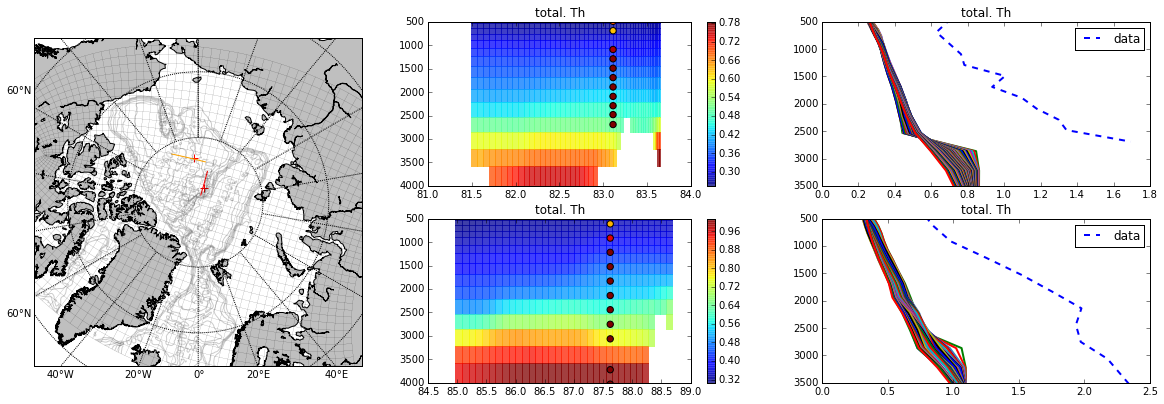

In [268]:
from matplotlib import gridspec
x=[660-400,625-400]
y=[280,310]
c=['orange','red','cyan']
ptrc=nc.Dataset(nc_filename[0])

lmin=30
lmax=46
tracer_evolution(ptrc,j=[35,40,43],string='Th',name=['total. Th','part. Th'])

If the value of the data could be devided by 2. The simulation results are closed to the observation. But there is no reason to do this. Anyway, it won't hurt to plot them out.

(35,) (16, 35)
(35,) (16, 35)


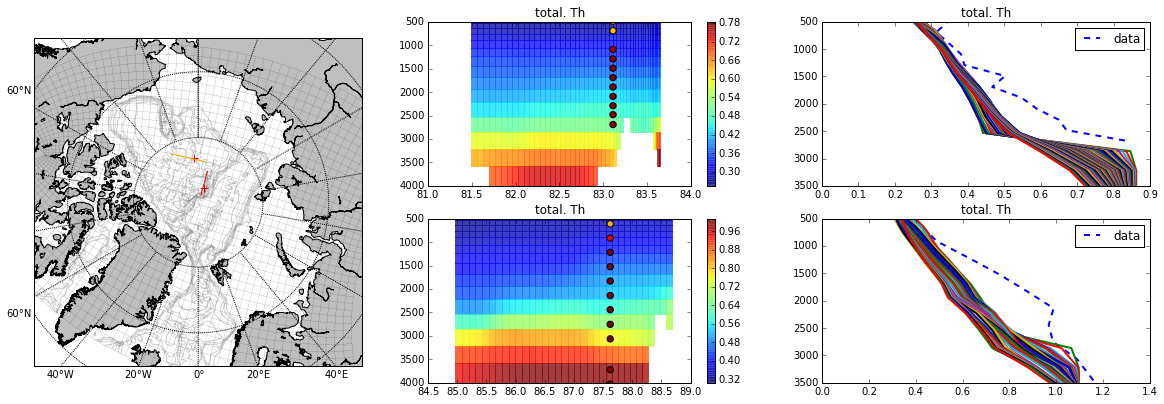

In [266]:
from matplotlib import gridspec
x=[660-400,625-400]
y=[280,310]
c=['orange','red','cyan']
ptrc=nc.Dataset(nc_filename[0])

lmin=30
lmax=46
tracer_evolution(ptrc,j=[35,40,43],string='Th',name=['total. Th','part. Th'])

HLY0503-18TC from the Healy–Oden Trans-Arctic Expedition of 2005

1. total
2. without error bar